Задача 4

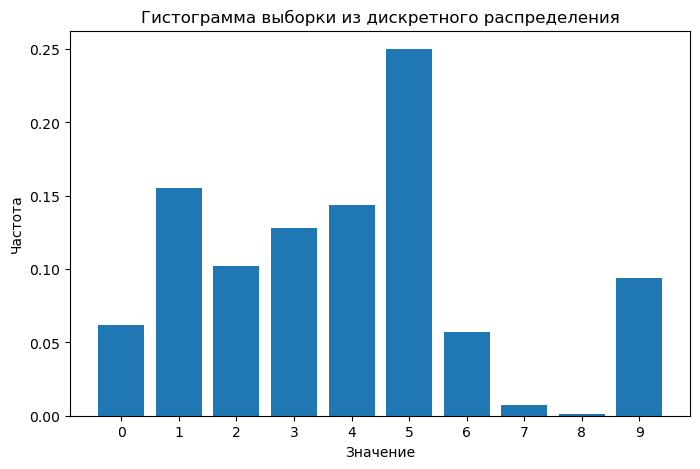

In [1]:
import numpy as np
import matplotlib.pyplot as plt
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
values = np.arange(10)
probs = weights / weights.sum()
sample = np.random.choice(values, size=1000, p=probs)
plt.figure(figsize=(8, 5))
plt.hist(sample, bins=np.arange(-0.5, 10.5, 1), density=True, rwidth=0.8)
plt.xticks(values)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма выборки из дискретного распределения')
plt.show()

Задача 5

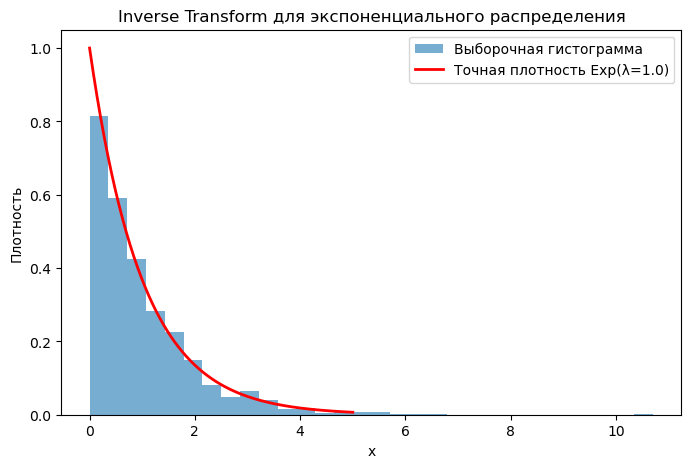

In [3]:
import numpy as np
import matplotlib.pyplot as plt
lam = 1.0
n = 1000
U = np.random.rand(n)
X = -np.log(U) / lam
x_vals = np.linspace(0, 5, 500)
pdf_vals = lam * np.exp(-lam * x_vals)
plt.figure(figsize=(8, 5))
plt.hist(X, bins=30, density=True, alpha=0.6, label='Выборочная гистограмма')
plt.plot(x_vals, pdf_vals, 'r-', lw=2, label=f'Точная плотность Exp(λ={lam})')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()
plt.title('Inverse Transform для экспоненциального распределения')
plt.show()

Задача 6

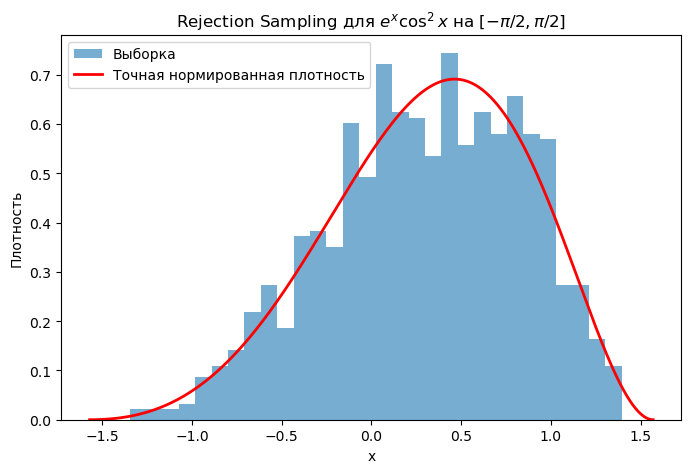

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return np.exp(x) * np.cos(x)**2
a, b = -np.pi/2, np.pi/2
x_dense = np.linspace(a + 1e-6, b - 1e-6, 10000)
M = np.max(f(x_dense)) 
n_needed = 0
samples = []
while len(samples) < 1000:
    x = np.random.uniform(a, b)
    y = np.random.uniform(0, M)
    if y <= f(x):
        samples.append(x)
    n_needed += 1

samples = np.array(samples)
Z = np.trapezoid(f(x_dense), x_dense)  
pdf_true = f(x_dense) / Z
plt.figure(figsize=(8, 5))
plt.hist(samples, bins=30, density=True, alpha=0.6, label='Выборка')
plt.plot(x_dense, pdf_true, 'r-', lw=2, label='Точная нормированная плотность')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()
plt.title('Rejection Sampling для $e^x \\cos^2 x$ на $[-\\pi/2, \\pi/2]$')
plt.show()

Задача 7

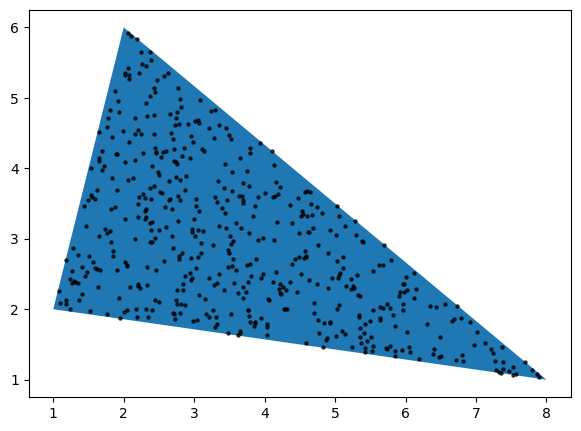

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
A = np.array([1, 2])
B = np.array([2, 6])
C = np.array([8, 1])
n = 500
u = np.random.rand(n)
v = np.random.rand(n)
mask = u + v > 1
u[mask] = 1 - u[mask]
v[mask] = 1 - v[mask]
points = A + np.outer(u, (B - A)) + np.outer(v, (C - A))
fig, ax = plt.subplots(figsize=(7, 6))
polygon = Polygon([A, B, C], closed=True)
ax.add_patch(polygon)
ax.scatter(points[:, 0], points[:, 1], s=5, c='black', alpha=0.7)

ax.set_aspect('equal')
plt.show()

Задача 8

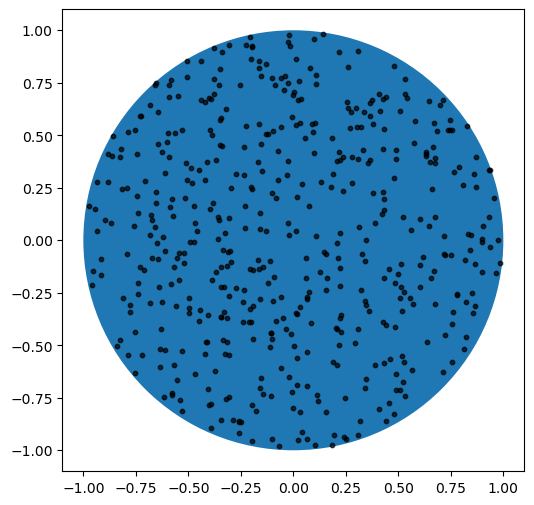

In [19]:
import numpy as np
import matplotlib.pyplot as plt
n = 500
theta = np.random.uniform(0, 2 * np.pi, n)
r = np.sqrt(np.random.uniform(0, 1, n))
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(figsize=(6, 6))
circle = plt.Circle((0, 0), 1, fill=True)
ax.add_patch(circle)
ax.scatter(x, y, s=10, c='black', alpha=0.7)
ax.set_aspect('equal')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
plt.show()

Да, точки действительно распределены равномерно

Истинное среднее: [4. 7.]
Выборочное среднее: [3.78128826 7.04034336]

Истинная ковариационная матрица:
 [[20. -4.]
 [-4. 40.]]

Выборочная ковариационная матрица:
 [[20.76152192 -4.68811309]
 [-4.68811309 39.090554  ]]


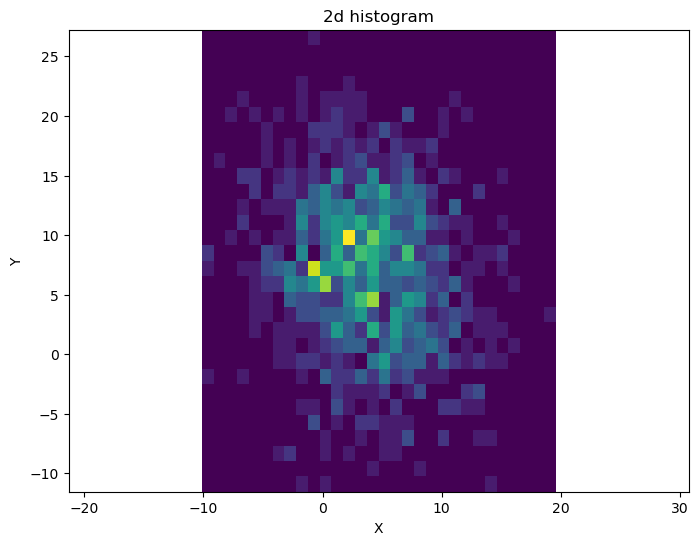

In [33]:
import numpy as np
import matplotlib.pyplot as plt
def func(n):
    x_vals = []
    y_vals = []
    while len(x_vals) < n:
        u = np.random.uniform(-1, 1)
        v = np.random.uniform(-1, 1)
        s = u * u + v * v
        if s == 0 or s >= 1:
            continue
        factor = np.sqrt(-2 * np.log(s) / s)
        x_vals.append(u * factor)
        y_vals.append(v * factor)
    return np.array(x_vals), np.array(y_vals)
mu = np.array([4.0, 7.0])
Sigma = np.array([[20.0, -4.0],[-4.0, 40.0]])
n = 1000
z1, z2 = func(n)
L = np.linalg.cholesky(Sigma)        
Z = np.vstack([z1, z2])             
X = mu[:, None] + L @ Z             
x_samples = X[0, :]
y_samples = X[1, :]
sample_mean = np.mean(X, axis=1)
sample_cov = np.cov(X)
print("Истинное среднее:", mu)
print("Выборочное среднее:", sample_mean)
print("\nИстинная ковариационная матрица:\n", Sigma)
print("\nВыборочная ковариационная матрица:\n", sample_cov)
fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('xkcd:white') 
plt.hist2d(x_samples, y_samples, bins=30)
plt.axis('equal')
plt.title("2d histogram")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()